In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Reshape and normalise
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Show the shape of the three datasets
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, Labels shape: {y_val.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (48000, 28, 28, 1), Labels shape: (48000,)
Validation data shape: (12000, 28, 28, 1), Labels shape: (12000,)
Testing data shape: (10000, 28, 28, 1), Labels shape: (10000,)


In [6]:
# Define data augmentation for training data
datagen = ImageDataGenerator(
    horizontal_flip=True
)

datagen.fit(x_train)

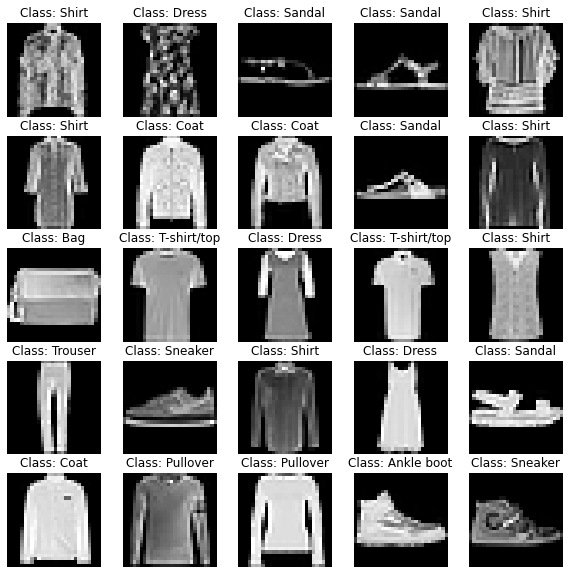

In [7]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize augmented data with labels
plt.figure(figsize=(10, 10))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=25):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f"Class: {class_names[y_batch[i]]}")
        plt.axis('off')
    plt.show()
    break  # Display only one batch of augmented images

In [8]:
activation_functions = ['relu', 'elu', 'LeakyReLU']

In [9]:
# Create a dictionary to store the models
models = {}

Epoch 1/50
750/750 [==============================] - 19s 24ms/step - loss: 0.5896 - accuracy: 0.7963 - val_loss: 0.4223 - val_accuracy: 0.8530
Epoch 2/50
750/750 [==============================] - 18s 23ms/step - loss: 0.4072 - accuracy: 0.8594 - val_loss: 0.3527 - val_accuracy: 0.8758
Epoch 3/50
750/750 [==============================] - 18s 24ms/step - loss: 0.3717 - accuracy: 0.8708 - val_loss: 0.3372 - val_accuracy: 0.8808
Epoch 4/50
750/750 [==============================] - 19s 25ms/step - loss: 0.3548 - accuracy: 0.8760 - val_loss: 0.3189 - val_accuracy: 0.8867
Epoch 5/50
750/750 [==============================] - 18s 24ms/step - loss: 0.3408 - accuracy: 0.8806 - val_loss: 0.3191 - val_accuracy: 0.8845
Epoch 6/50
750/750 [==============================] - 19s 25ms/step - loss: 0.3292 - accuracy: 0.8847 - val_loss: 0.3031 - val_accuracy: 0.8930
Epoch 7/50
750/750 [==============================] - 20s 27ms/step - loss: 0.3227 - accuracy: 0.8862 - val_loss: 0.3056 - val_accuracy:

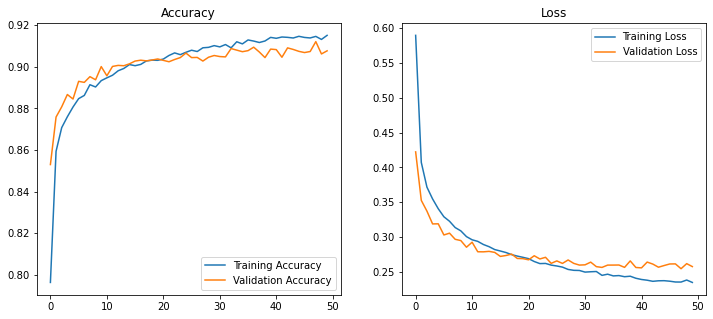

Epoch 1/50
750/750 [==============================] - 25s 32ms/step - loss: 0.6061 - accuracy: 0.7924 - val_loss: 0.4633 - val_accuracy: 0.8425
Epoch 2/50
750/750 [==============================] - 24s 32ms/step - loss: 0.4571 - accuracy: 0.8438 - val_loss: 0.4310 - val_accuracy: 0.8536
Epoch 3/50
750/750 [==============================] - 25s 34ms/step - loss: 0.4213 - accuracy: 0.8546 - val_loss: 0.3952 - val_accuracy: 0.8642
Epoch 4/50
750/750 [==============================] - 25s 33ms/step - loss: 0.3992 - accuracy: 0.8631 - val_loss: 0.3731 - val_accuracy: 0.8712
Epoch 5/50
750/750 [==============================] - 29s 39ms/step - loss: 0.3826 - accuracy: 0.8682 - val_loss: 0.3681 - val_accuracy: 0.8727
Epoch 6/50
750/750 [==============================] - 26s 35ms/step - loss: 0.3730 - accuracy: 0.8718 - val_loss: 0.3494 - val_accuracy: 0.8779
Epoch 7/50
750/750 [==============================] - 23s 31ms/step - loss: 0.3620 - accuracy: 0.8751 - val_loss: 0.3428 - val_accuracy:

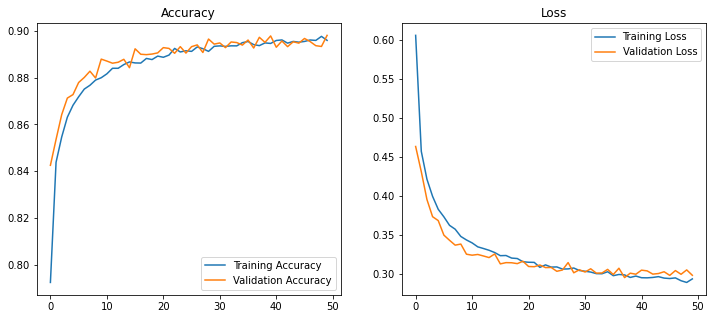

Epoch 1/50
750/750 [==============================] - 22s 28ms/step - loss: 0.5926 - accuracy: 0.7959 - val_loss: 0.4249 - val_accuracy: 0.8555
Epoch 2/50
750/750 [==============================] - 24s 32ms/step - loss: 0.4211 - accuracy: 0.8535 - val_loss: 0.3843 - val_accuracy: 0.8648
Epoch 3/50
750/750 [==============================] - 21s 29ms/step - loss: 0.3887 - accuracy: 0.8661 - val_loss: 0.3512 - val_accuracy: 0.8779
Epoch 4/50
750/750 [==============================] - 21s 27ms/step - loss: 0.3677 - accuracy: 0.8726 - val_loss: 0.3424 - val_accuracy: 0.8810
Epoch 5/50
750/750 [==============================] - 22s 29ms/step - loss: 0.3563 - accuracy: 0.8760 - val_loss: 0.3345 - val_accuracy: 0.8817
Epoch 6/50
750/750 [==============================] - 21s 29ms/step - loss: 0.3467 - accuracy: 0.8792 - val_loss: 0.3339 - val_accuracy: 0.8806
Epoch 7/50
750/750 [==============================] - 21s 28ms/step - loss: 0.3388 - accuracy: 0.8811 - val_loss: 0.3493 - val_accuracy:

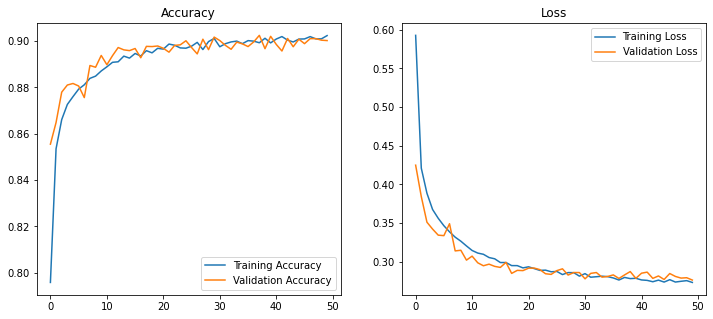

In [12]:
for activation_function in activation_functions:
    # Define the CNN model
    model = Sequential()
    
    # Convolutional layer
    model.add(Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.42)) 
    
    # Flatten the output for the fully connected layers
    model.add(Flatten())
    
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model with Adam optimizer
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                        epochs=50, 
                        validation_data=(x_val, y_val))
    
    # Store the model in the dictionary
    models[activation_function] = model

    # Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

In [13]:
# Define a function to evaluate and visualize a model
def evaluate_and_visualize_model(model, model_name):
    # Evaluate the model on the test dataset
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'{model_name} Test Loss: {test_loss:.4f}')
    print(f'{model_name} Test Accuracy: {test_accuracy * 100:.2f}%')

    # Predict class labels for the test data
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Generate a classification report
    report = classification_report(y_test, y_pred_classes, target_names=class_names)
    print(f"{model_name} Classification Report:\n", report)

    # Generate a confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

313/313 [==============================] - 2s 5ms/step - loss: 0.2738 - accuracy: 0.9050
Model with Activation Function: relu Test Loss: 0.2738
Model with Activation Function: relu Test Accuracy: 90.50%
313/313 [==============================] - 2s 4ms/step
Model with Activation Function: relu Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.81      0.90      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.88      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.87      0.82      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.79      0.68      0.73      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.

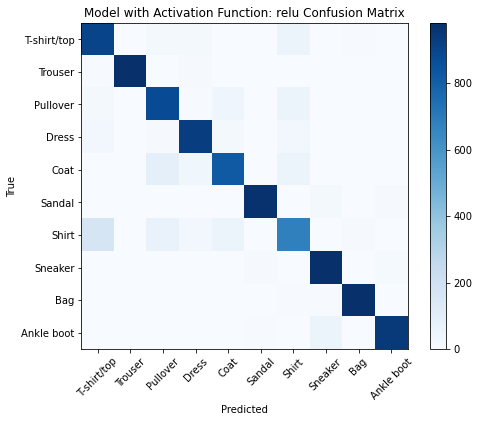

313/313 [==============================] - 2s 4ms/step - loss: 0.3160 - accuracy: 0.8891
Model with Activation Function: elu Test Loss: 0.3160
Model with Activation Function: elu Test Accuracy: 88.91%
313/313 [==============================] - 2s 5ms/step
Model with Activation Function: elu Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.86      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.77      0.87      0.82      1000
       Dress       0.92      0.86      0.89      1000
        Coat       0.84      0.82      0.83      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.75      0.65      0.70      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89 

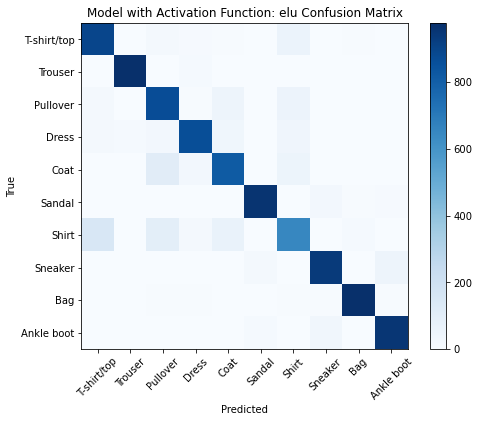

313/313 [==============================] - 2s 5ms/step - loss: 0.2935 - accuracy: 0.8971
Model with Activation Function: LeakyReLU Test Loss: 0.2935
Model with Activation Function: LeakyReLU Test Accuracy: 89.71%
313/313 [==============================] - 2s 5ms/step
Model with Activation Function: LeakyReLU Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.82      0.86      0.84      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.82      0.87      0.85      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.77      0.65      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.90     10000
   macro avg    

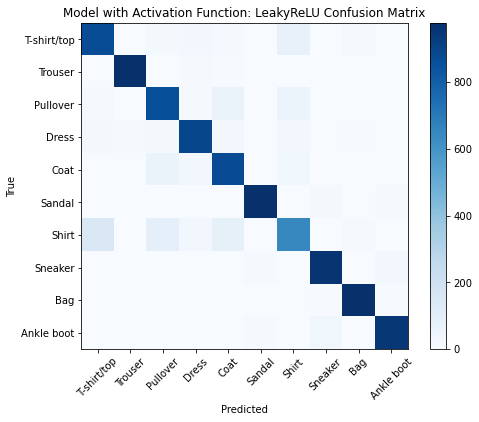

In [14]:
# Evaluate and visualize all models using the same metrics
for activation_function, model in models.items():
    evaluate_and_visualize_model(model, f"Model with Activation Function: {activation_function}")

Epoch 1/50
750/750 [==============================] - 375s 492ms/step - loss: 1.0179 - accuracy: 0.6379 - val_loss: 0.7755 - val_accuracy: 0.7186
Epoch 2/50
750/750 [==============================] - 96s 129ms/step - loss: 0.6487 - accuracy: 0.7638 - val_loss: 0.5703 - val_accuracy: 0.7987
Epoch 3/50
750/750 [==============================] - 109s 146ms/step - loss: 0.5612 - accuracy: 0.7957 - val_loss: 0.5142 - val_accuracy: 0.8189
Epoch 4/50
750/750 [==============================] - 102s 136ms/step - loss: 0.5134 - accuracy: 0.8146 - val_loss: 0.4677 - val_accuracy: 0.8338
Epoch 5/50
750/750 [==============================] - 59s 78ms/step - loss: 0.4751 - accuracy: 0.8267 - val_loss: 0.4381 - val_accuracy: 0.8391
Epoch 6/50
750/750 [==============================] - 58s 78ms/step - loss: 0.4448 - accuracy: 0.8386 - val_loss: 0.4143 - val_accuracy: 0.8457
Epoch 7/50
750/750 [==============================] - 65s 87ms/step - loss: 0.4262 - accuracy: 0.8434 - val_loss: 0.3826 - val_ac

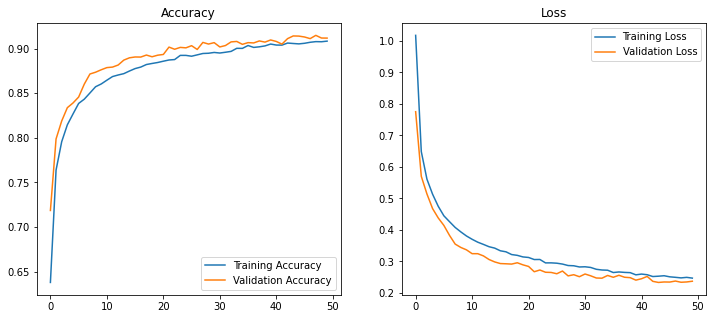

In [28]:
# Define the improved CNN model
improved_model = Sequential()

# First convolutional layer
improved_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))
improved_model.add(Dropout(0.5)) 

# Second convolutional layer
improved_model.add(Conv2D(64, (3, 3), activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))
improved_model.add(Dropout(0.5)) 

# Flatten the output for the fully connected layers
improved_model.add(Flatten())

# Fully Connected Layer
improved_model.add(Dense(128, activation='relu'))
improved_model.add(BatchNormalization())

# Output Layer
improved_model.add(Dense(10, activation='softmax'))

# Compile the improved model with Adam optimizer
improved_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the improved model
improved_history = improved_model.fit(datagen.flow(x_train, y_train, batch_size=64), 
                                      epochs=50, 
                                      validation_data=(x_val, y_val))

# Plot training history (accuracy and loss) for the improved model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(improved_history.history['accuracy'], label='Training Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


313/313 [==============================] - 3s 9ms/step - loss: 0.2516 - accuracy: 0.9064
Improved Model Test Loss: 0.2516
Improved Model Test Accuracy: 90.64%
313/313 [==============================] - 3s 8ms/step
Improved Model Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.90      0.81      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.68      0.79      0.73      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91

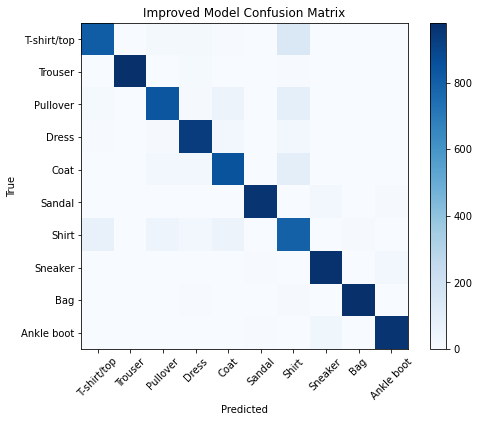

In [29]:
evaluate_and_visualize_model(improved_model, "Improved Model")